# Logistic Regression on handwritten digit dataset (with standardization)

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [2]:
from sklearn.datasets import load_digits

In [3]:
digit = load_digits()

In [4]:
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
digit['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digit['data'].shape

(1797, 64)

In [7]:
digit['feature_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [8]:
df = pd.DataFrame(data = digit['data'],columns=digit['feature_names'])
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
df['target'] = digit['target']

In [10]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [11]:
x = df[df.columns[:-1]]
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [12]:
y = df[df.columns[-1:]]
y

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


## Standardization

In [13]:
len(x)

1797

In [14]:
for i in x.columns:
    mean = x[i].mean()
    std = x[i].std()
    for j in range(len(x)):
        if std != 0:
            x[i][j] = (x[i][j] - mean) / std

x

C:\Users\HP\AppData\Local\Temp\ipykernel_20556\3968503653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i][j] = (x[i][j] - mean) / std


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.334923,-0.043069,0.273995,-0.664293,-0.843894,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,0.086695,0.208235,-0.366669,-1.146328,-0.505529,-0.195953
1,0.0,-0.334923,-1.094632,0.038637,0.268676,-0.137981,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-0.248940,0.849396,0.548408,-0.505529,-0.195953
2,0.0,-0.334923,-1.094632,-1.844229,0.735161,1.097367,-0.409610,-0.124988,-0.059061,-0.623836,...,0.259158,-0.209727,-0.02359,-0.298998,-1.089080,-2.077640,-0.163992,1.565250,1.694665,-0.195953
3,0.0,-0.334923,0.377556,0.744712,0.268676,-0.843894,-0.409610,-0.124988,-0.059061,1.879168,...,1.072264,-0.209727,-0.02359,-0.298998,0.282657,0.208235,0.241363,0.378934,-0.505529,-0.195953
4,0.0,-0.334923,-1.094632,-2.550304,-0.197808,-1.020373,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-2.306227,0.849396,-0.468434,-0.505529,-0.195953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.334923,-0.253382,-0.432080,0.268676,0.038497,-0.409610,-0.124988,-0.059061,-0.310960,...,0.055881,-0.209727,-0.02359,-0.298998,-0.697155,0.436822,0.646718,0.378934,-0.505529,-0.195953
1793,0.0,-0.334923,0.167244,0.980070,0.268676,0.920889,-0.108928,-0.124988,-0.059061,-0.623836,...,-0.553948,-0.209727,-0.02359,-0.298998,0.086695,0.893997,0.444041,-0.129487,-0.505529,-0.195953
1794,0.0,-0.334923,-0.884320,-0.196721,0.735161,-0.843894,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.757225,-0.209727,-0.02359,-0.298998,-0.697155,-0.706115,0.241363,-0.129487,-0.505529,-0.195953
1795,0.0,-0.334923,-0.674007,-0.432080,-1.130777,-1.020373,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.350672,-0.209727,-0.02359,-0.298998,-0.109268,-0.020353,0.849396,0.887355,-0.505529,-0.195953


## Adding 'x0' column = 1 in x for coding purpose 

In [15]:
x['x0'] = 1
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,x0
0,0.0,-0.334923,-0.043069,0.273995,-0.664293,-0.843894,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.209727,-0.02359,-0.298998,0.086695,0.208235,-0.366669,-1.146328,-0.505529,-0.195953,1
1,0.0,-0.334923,-1.094632,0.038637,0.268676,-0.137981,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.209727,-0.02359,-0.298998,-1.089080,-0.248940,0.849396,0.548408,-0.505529,-0.195953,1
2,0.0,-0.334923,-1.094632,-1.844229,0.735161,1.097367,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.209727,-0.02359,-0.298998,-1.089080,-2.077640,-0.163992,1.565250,1.694665,-0.195953,1
3,0.0,-0.334923,0.377556,0.744712,0.268676,-0.843894,-0.409610,-0.124988,-0.059061,1.879168,...,-0.209727,-0.02359,-0.298998,0.282657,0.208235,0.241363,0.378934,-0.505529,-0.195953,1
4,0.0,-0.334923,-1.094632,-2.550304,-0.197808,-1.020373,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.209727,-0.02359,-0.298998,-1.089080,-2.306227,0.849396,-0.468434,-0.505529,-0.195953,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.334923,-0.253382,-0.432080,0.268676,0.038497,-0.409610,-0.124988,-0.059061,-0.310960,...,-0.209727,-0.02359,-0.298998,-0.697155,0.436822,0.646718,0.378934,-0.505529,-0.195953,1
1793,0.0,-0.334923,0.167244,0.980070,0.268676,0.920889,-0.108928,-0.124988,-0.059061,-0.623836,...,-0.209727,-0.02359,-0.298998,0.086695,0.893997,0.444041,-0.129487,-0.505529,-0.195953,1
1794,0.0,-0.334923,-0.884320,-0.196721,0.735161,-0.843894,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.209727,-0.02359,-0.298998,-0.697155,-0.706115,0.241363,-0.129487,-0.505529,-0.195953,1
1795,0.0,-0.334923,-0.674007,-0.432080,-1.130777,-1.020373,-0.409610,-0.124988,-0.059061,-0.623836,...,-0.209727,-0.02359,-0.298998,-0.109268,-0.020353,0.849396,0.887355,-0.505529,-0.195953,1


In [16]:
columns = list()
columns.append(x.columns[-1])

for i in x.columns[:-1]:
    columns.append(i)
columns

['x0',
 'pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [17]:
x[columns]

,x0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,1,0.0,-0.334923,-0.043069,0.273995,-0.664293,-0.843894,-0.409610,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,0.086695,0.208235,-0.366669,-1.146328,-0.505529,-0.195953
1,1,0.0,-0.334923,-1.094632,0.038637,0.268676,-0.137981,-0.409610,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-0.248940,0.849396,0.548408,-0.505529,-0.195953
2,1,0.0,-0.334923,-1.094632,-1.844229,0.735161,1.097367,-0.409610,-0.124988,-0.059061,...,0.259158,-0.209727,-0.02359,-0.298998,-1.089080,-2.077640,-0.163992,1.565250,1.694665,-0.195953
3,1,0.0,-0.334923,0.377556,0.744712,0.268676,-0.843894,-0.409610,-0.124988,-0.059061,...,1.072264,-0.209727,-0.02359,-0.298998,0.282657,0.208235,0.241363,0.378934,-0.505529,-0.195953
4,1,0.0,-0.334923,-1.094632,-2.550304,-0.197808,-1.020373,-0.409610,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-2.306227,0.849396,-0.468434,-0.505529,-0.195953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,1,0.0,-0.334923,-0.253382,-0.432080,0.268676,0.038497,-0.409610,-0.124988,-0.059061,...,0.055881,-0.209727,-0.02359,-0.298998,-0.697155,0.436822,0.646718,0.378934,-0.505529,-0.195953
1793,1,0.0,-0.334923,0.167244,0.980070,0.268676,0.920889,-0.108928,-0.124988,-0.059061,...,-0.553948,-0.209727,-0.02359,-0.298998,0.086695,0.893997,0.444041,-0.129487,-0.505529,-0.195953
1794,1,0.0,-0.334923,-0.884320,-0.196721,0.735161,-0.843894,-0.409610,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-0.697155,-0.706115,0.241363,-0.129487,-0.505529,-0.195953
1795,1,0.0,-0.334923,-0.674007,-0.432080,-1.130777,-1.020373,-0.409610,-0.124988,-0.059061,...,-0.350672,-0.209727,-0.02359,-0.298998,-0.109268,-0.020353,0.849396,0.887355,-0.505529,-0.195953


In [18]:
x = x[columns]
x

,x0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,1,0.0,-0.334923,-0.043069,0.273995,-0.664293,-0.843894,-0.409610,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,0.086695,0.208235,-0.366669,-1.146328,-0.505529,-0.195953
1,1,0.0,-0.334923,-1.094632,0.038637,0.268676,-0.137981,-0.409610,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-0.248940,0.849396,0.548408,-0.505529,-0.195953
2,1,0.0,-0.334923,-1.094632,-1.844229,0.735161,1.097367,-0.409610,-0.124988,-0.059061,...,0.259158,-0.209727,-0.02359,-0.298998,-1.089080,-2.077640,-0.163992,1.565250,1.694665,-0.195953
3,1,0.0,-0.334923,0.377556,0.744712,0.268676,-0.843894,-0.409610,-0.124988,-0.059061,...,1.072264,-0.209727,-0.02359,-0.298998,0.282657,0.208235,0.241363,0.378934,-0.505529,-0.195953
4,1,0.0,-0.334923,-1.094632,-2.550304,-0.197808,-1.020373,-0.409610,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-2.306227,0.849396,-0.468434,-0.505529,-0.195953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,1,0.0,-0.334923,-0.253382,-0.432080,0.268676,0.038497,-0.409610,-0.124988,-0.059061,...,0.055881,-0.209727,-0.02359,-0.298998,-0.697155,0.436822,0.646718,0.378934,-0.505529,-0.195953
1793,1,0.0,-0.334923,0.167244,0.980070,0.268676,0.920889,-0.108928,-0.124988,-0.059061,...,-0.553948,-0.209727,-0.02359,-0.298998,0.086695,0.893997,0.444041,-0.129487,-0.505529,-0.195953
1794,1,0.0,-0.334923,-0.884320,-0.196721,0.735161,-0.843894,-0.409610,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-0.697155,-0.706115,0.241363,-0.129487,-0.505529,-0.195953
1795,1,0.0,-0.334923,-0.674007,-0.432080,-1.130777,-1.020373,-0.409610,-0.124988,-0.059061,...,-0.350672,-0.209727,-0.02359,-0.298998,-0.109268,-0.020353,0.849396,0.887355,-0.505529,-0.195953


## Modifying Output Class 

In [19]:
y

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [20]:
y.value_counts()

target
3         183
1         182
5         182
4         181
6         181
9         180
7         179
0         178
2         177
8         174
dtype: int64

In [21]:
classes = list()
check = dict()

for i in y[y.columns[0]]:
    if i not in check:
        check[i] = 1
        classes.append(i)
    else:
        check[i] = check[i] + 1

In [22]:
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
check

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

In [24]:
y_multiclass = np.zeros((len(y),len(classes)))
y_multiclass

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
y_multiclass.shape

(1797, 10)

In [26]:
for j in range(len(classes)):
    for i in range(len(y)):
        if y.iloc[i,0] == classes[j]:
            y_multiclass[i,j] = 1

y_multiclass

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [27]:
y_df = pd.DataFrame(data=y_multiclass,columns=classes)

In [28]:
y_df

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1793,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y_df,test_size=0.23,random_state=2)

In [30]:
x_train

,x0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
503,1,0.0,-0.334923,1.218807,0.744712,0.735161,1.803281,2.296526,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,1.066507,0.893997,-0.772024,-1.146328,-0.505529,-0.195953
65,1,0.0,-0.334923,-1.094632,-0.667438,-0.431050,-1.020373,-0.409610,-0.124988,-0.059061,...,2.088647,-0.209727,-0.02359,-0.298998,-1.089080,-1.391877,0.038686,1.226303,1.694665,-0.195953
387,1,0.0,-0.334923,-1.094632,-2.785662,0.268676,1.803281,1.394481,-0.124988,-0.059061,...,0.665711,-0.209727,-0.02359,-0.298998,-1.089080,-2.534814,0.038686,1.226303,0.716801,-0.195953
1481,1,0.0,-0.334923,-0.253382,0.744712,-2.530231,-1.020373,-0.409610,-0.124988,-0.059061,...,0.462434,-0.209727,-0.02359,-0.298998,-0.109268,0.436822,0.849396,0.717882,-0.505529,-0.195953
681,1,0.0,-0.334923,2.060057,0.038637,-0.197808,0.038497,0.191754,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,1.458431,0.893997,-1.177379,-1.146328,-0.505529,-0.195953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1,0.0,-0.334923,-0.463694,-0.196721,0.268676,1.626802,0.492435,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-0.697155,-0.020353,0.444041,-0.637907,-0.505529,-0.195953
1608,1,0.0,-0.334923,-1.094632,-0.196721,-0.897535,-1.020373,-0.409610,-0.124988,-0.059061,...,1.682094,-0.209727,-0.02359,-0.298998,-1.089080,-0.706115,0.646718,1.395776,0.227869,-0.195953
493,1,0.0,-0.334923,-1.094632,-1.844229,0.501919,1.450324,0.793117,-0.124988,-0.059061,...,-0.350672,-0.209727,-0.02359,-0.298998,-1.089080,-1.849052,0.849396,1.395776,0.472335,-0.195953
527,1,0.0,-0.334923,0.167244,0.273995,-2.763473,-1.020373,-0.409610,-0.124988,-0.059061,...,0.259158,0.806120,-0.02359,-0.298998,0.086695,0.893997,0.849396,1.565250,3.405927,6.255238


In [31]:
y_train

,0,1,2,3,4,5,6,7,8,9
503,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
387,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
681,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1608,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
493,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression

## Initializing weights

In [32]:
n = len(x_train.columns)
n

65

In [33]:
w = np.zeros((len(x_train.columns),len(classes)))
w

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

## Adjusting Weights

In [34]:
import math
math.exp(1)

2.718281828459045

In [35]:
w.shape

(65, 10)

In [36]:
x_train

,x0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
503,1,0.0,-0.334923,1.218807,0.744712,0.735161,1.803281,2.296526,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,1.066507,0.893997,-0.772024,-1.146328,-0.505529,-0.195953
65,1,0.0,-0.334923,-1.094632,-0.667438,-0.431050,-1.020373,-0.409610,-0.124988,-0.059061,...,2.088647,-0.209727,-0.02359,-0.298998,-1.089080,-1.391877,0.038686,1.226303,1.694665,-0.195953
387,1,0.0,-0.334923,-1.094632,-2.785662,0.268676,1.803281,1.394481,-0.124988,-0.059061,...,0.665711,-0.209727,-0.02359,-0.298998,-1.089080,-2.534814,0.038686,1.226303,0.716801,-0.195953
1481,1,0.0,-0.334923,-0.253382,0.744712,-2.530231,-1.020373,-0.409610,-0.124988,-0.059061,...,0.462434,-0.209727,-0.02359,-0.298998,-0.109268,0.436822,0.849396,0.717882,-0.505529,-0.195953
681,1,0.0,-0.334923,2.060057,0.038637,-0.197808,0.038497,0.191754,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,1.458431,0.893997,-1.177379,-1.146328,-0.505529,-0.195953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1,0.0,-0.334923,-0.463694,-0.196721,0.268676,1.626802,0.492435,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-0.697155,-0.020353,0.444041,-0.637907,-0.505529,-0.195953
1608,1,0.0,-0.334923,-1.094632,-0.196721,-0.897535,-1.020373,-0.409610,-0.124988,-0.059061,...,1.682094,-0.209727,-0.02359,-0.298998,-1.089080,-0.706115,0.646718,1.395776,0.227869,-0.195953
493,1,0.0,-0.334923,-1.094632,-1.844229,0.501919,1.450324,0.793117,-0.124988,-0.059061,...,-0.350672,-0.209727,-0.02359,-0.298998,-1.089080,-1.849052,0.849396,1.395776,0.472335,-0.195953
527,1,0.0,-0.334923,0.167244,0.273995,-2.763473,-1.020373,-0.409610,-0.124988,-0.059061,...,0.259158,0.806120,-0.02359,-0.298998,0.086695,0.893997,0.849396,1.565250,3.405927,6.255238


In [37]:
x_train.iloc[0,2]

-0.33492325878805995

In [38]:
y_train

,0,1,2,3,4,5,6,7,8,9
503,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
387,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
681,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1608,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
493,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
y_train.iloc[1,0]

0.0

In [40]:
# math.log is what we interpret ln in math
math.log(10)

2.302585092994046

1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

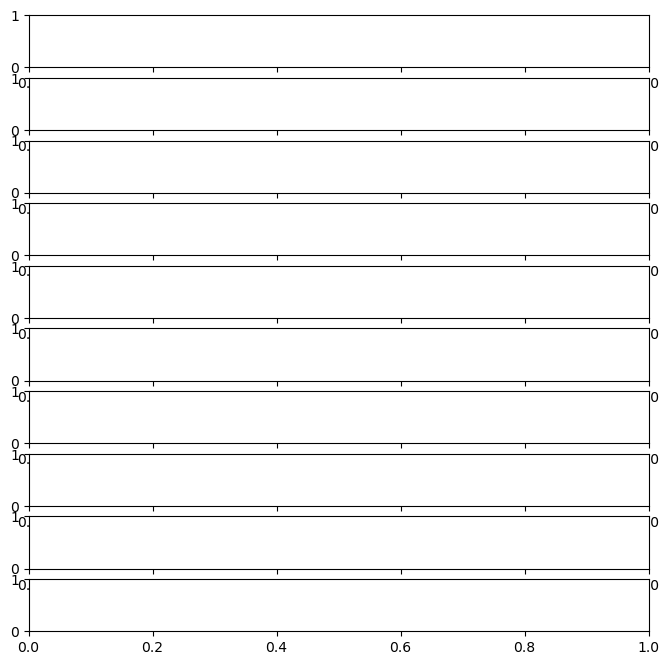

In [41]:
fig, axs = plt.subplots(len(classes), 1, figsize=(8,8))

for k in range(len(classes)):
        
    count_list = list()
    loss_list = list()

    for count in range(1,301):

        count_list.append(count)

        
        # calculating predicted value (pre threshold) using sigmoid function

        linear_sum = 0
        y_cap = list()

        for j in range(len(x_train)):
            for i in range(len(x_train.columns)):
                linear_sum = linear_sum + w[i,k] * x_train.iloc[j,i]

            predicted_value = 1 / (1 + math.exp(-1*linear_sum))
            y_cap.append(predicted_value)
            linear_sum = 0


        # calculating average loss

        loss_sum = 0

        for i in range(len(y_train)):
            loss = -1 * y_train.iloc[i,k] * math.log(y_cap[i]) - (1 - y_train.iloc[i,k]) * math.log(1 - y_cap[i])
            loss_sum = loss_sum + loss

        avg_loss = loss_sum / len(y_train)
        loss_list.append(avg_loss)


        # optimizing with gradient descent

        gradient_sum = 0
        dw_list = list()

        for i in range(len(x.columns)):
            for j in range(len(x_train)):
                gradient_sum = gradient_sum + (y_cap[j] - y_train.iloc[j,k]) * x_train.iloc[j,i]
            dw = gradient_sum / len(x_train)
            dw_list.append(dw)
            gradient_sum = 0


        # updating weights

        learning_rate = 0.2

        for i in range(len(dw_list)):
            w[i,k] = w[i,k] - learning_rate * dw_list[i]
        
        print(count)
        
    axs[k].plot(count_list, loss_list)

In [350]:
w

array([[-2.90604337, -1.1374891 , -6.10076449],
       [-1.201012  , -0.17846232, -0.44282747],
       [ 2.60005447, -1.29391187, -1.11192111],
       [-2.71768921,  2.19735664,  3.59428319],
       [-2.5605906 , -1.97975523,  5.83258055]])

## Training Accuracy

just checking if the updated weights after 300 iterations are performing well on train dataset

In [351]:
y_train.shape

(112, 3)

In [352]:
y_prediction = np.zeros((y_train.shape[0],y_train.shape[1]))
y_prediction.shape

(112, 3)

In [353]:
y_prediction

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [354]:
y_prediction[0,0]

0.0

In [355]:
x_train.shape

(112, 5)

In [356]:
# calculating predicted value using sigmoid function

linear_sum = 0
y_cap = list()

for k in range(len(classes)):
    for j in range(len(x_train)):
        for i in range(len(x_train.columns)):
            linear_sum = linear_sum + w[i,k] * x_train.iloc[j,i]

        predicted_value = 1 / (1 + math.exp(-1*linear_sum))
        y_prediction[j,k] = predicted_value
        linear_sum = 0

In [357]:
y_prediction

array([[3.34927960e-03, 5.64167428e-01, 3.26303823e-02],
       [1.80623281e-06, 2.11203259e-01, 9.98037253e-01],
       [9.99726656e-01, 2.54300608e-02, 1.42726948e-08],
       [9.99942933e-01, 3.41005860e-02, 1.88721065e-09],
       [9.98173315e-01, 1.93970633e-01, 1.69394888e-08],
       [3.13801268e-04, 2.85858023e-01, 4.84960009e-01],
       [6.49741952e-03, 3.13808790e-01, 1.17221875e-01],
       [9.98876222e-01, 2.48870418e-01, 5.89220859e-09],
       [1.14795382e-05, 2.85238945e-01, 9.90208094e-01],
       [7.96160732e-03, 7.04474746e-01, 2.49044724e-03],
       [9.97276874e-01, 2.62266156e-01, 7.47198219e-09],
       [2.53230606e-02, 4.96767110e-01, 1.38301492e-03],
       [3.13549683e-03, 7.31086685e-01, 6.58659087e-03],
       [9.94304246e-01, 7.85115708e-02, 1.28483875e-07],
       [8.39568462e-05, 4.45055601e-01, 9.48956633e-01],
       [9.99811263e-01, 5.06035928e-02, 3.44191038e-09],
       [1.65200382e-02, 7.23444695e-01, 1.70608334e-03],
       [3.26438208e-06, 7.88076

In [358]:
max = -1
y_cap = list()

for i in range(y_prediction.shape[0]):
    for j in range(y_prediction.shape[1]):
        if y_prediction[i,j] > max:
            max = y_prediction[i,j]
            class_name = classes[j]
    
    y_cap.append(class_name)
    max = -1

y_cap

['versicolor',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'versicolor',
 'virginica',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'versic

In [359]:
x_train.index

Int64Index([ 94, 135,  21,  22,  29,  77,  66,  13, 102,  67,
            ...
            132,  40, 137,  75,  87,  63,  70,  81,  11,  95],
           dtype='int64', length=112)

In [360]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [361]:
y_train

,setosa,versicolor,virginica
94,0.0,1.0,0.0
135,0.0,0.0,1.0
21,1.0,0.0,0.0
22,1.0,0.0,0.0
29,1.0,0.0,0.0
...,...,...,...
63,0.0,1.0,0.0
70,0.0,1.0,0.0
81,0.0,1.0,0.0
11,1.0,0.0,0.0


In [362]:
y_train.index

Int64Index([ 94, 135,  21,  22,  29,  77,  66,  13, 102,  67,
            ...
            132,  40, 137,  75,  87,  63,  70,  81,  11,  95],
           dtype='int64', length=112)

In [363]:
for i in y_train.index:
    print(y[y.columns[0]][i])

versicolor
virginica
setosa
setosa
setosa
versicolor
versicolor
setosa
virginica
versicolor
setosa
versicolor
versicolor
setosa
virginica
setosa
versicolor
virginica
versicolor
setosa
setosa
versicolor
setosa
versicolor
virginica
virginica
versicolor
setosa
versicolor
setosa
virginica
virginica
versicolor
virginica
versicolor
virginica
setosa
setosa
setosa
versicolor
setosa
setosa
setosa
virginica
setosa
setosa
virginica
virginica
setosa
setosa
virginica
virginica
virginica
setosa
versicolor
virginica
setosa
setosa
virginica
virginica
setosa
versicolor
setosa
virginica
virginica
setosa
virginica
versicolor
versicolor
virginica
setosa
virginica
setosa
versicolor
virginica
setosa
versicolor
setosa
virginica
versicolor
virginica
setosa
virginica
virginica
virginica
versicolor
setosa
setosa
virginica
versicolor
setosa
versicolor
virginica
virginica
virginica
versicolor
setosa
virginica
setosa
virginica
versicolor
virginica
virginica
setosa
virginica
versicolor
versicolor
versicolor
versico

In [364]:
# measuring accuracy

right = 0
wrong = 0

j = 0
for i in y_train.index:
    if y_cap[j] == y[y.columns[0]][i]:
        right = right + 1
    else:
        wrong = wrong + 1
    j = j + 1

accuracy = ( right * 100 ) / len(y_train)

print('Total :',len(y_train))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 112
Right : 107
Wrong : 5
Accuracy : 95.53571428571429


## Test Accuracy

In [365]:
y_test.shape

(38, 3)

In [366]:
y_prediction = np.zeros((y_test.shape[0],y_test.shape[1]))
y_prediction.shape

(38, 3)

In [367]:
y_prediction

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [368]:
y_prediction[0,0]

0.0

In [369]:
x_test.shape

(38, 5)

In [370]:
# calculating predicted value (post threshold) using sigmoid function

linear_sum = 0
y_cap = list()

for k in range(len(classes)):
    for j in range(len(x_test)):
        for i in range(len(x_test.columns)):
            linear_sum = linear_sum + w[i,k] * x_test.iloc[j,i]

        predicted_value = 1 / (1 + math.exp(-1*linear_sum))
        y_prediction[j,k] = predicted_value
        linear_sum = 0

In [371]:
y_prediction

array([[9.99989326e-01, 7.92281542e-03, 5.65516227e-10],
       [9.99906434e-01, 1.03883860e-02, 4.84338022e-09],
       [9.98212532e-01, 3.16156928e-02, 1.42159911e-07],
       [6.19995321e-05, 5.57831617e-01, 6.31310041e-01],
       [2.91899294e-03, 2.36414653e-01, 2.56451401e-02],
       [7.73776253e-05, 4.21142272e-01, 8.15118232e-01],
       [2.26060130e-05, 8.13913114e-01, 4.28413410e-01],
       [4.80036615e-04, 7.72807421e-01, 6.19482025e-02],
       [1.42949478e-05, 5.35904699e-01, 9.50943289e-01],
       [9.94071863e-01, 2.46055767e-01, 1.69143161e-08],
       [1.12663958e-04, 1.97553653e-01, 9.39743328e-01],
       [9.99989505e-01, 1.65768621e-02, 4.89828986e-10],
       [9.97453379e-01, 5.64937253e-02, 2.62389390e-08],
       [5.91171648e-07, 6.90959910e-01, 9.96576922e-01],
       [6.24643341e-04, 2.36813669e-01, 6.94500142e-01],
       [2.98643220e-03, 4.04532600e-01, 1.58855586e-02],
       [2.31424213e-02, 3.18279442e-01, 1.25876192e-02],
       [9.55215505e-03, 4.10889

In [372]:
max = -1
y_cap = list()

for i in range(y_prediction.shape[0]):
    for j in range(y_prediction.shape[1]):
        if y_prediction[i,j] > max:
            max = y_prediction[i,j]
            class_name = classes[j]
    
    y_cap.append(class_name)
    max = -1

y_cap

['setosa',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor']

In [373]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [374]:
y_test

,setosa,versicolor,virginica
33,1.0,0.0,0.0
16,1.0,0.0,0.0
43,1.0,0.0,0.0
129,0.0,0.0,1.0
50,0.0,1.0,0.0
123,0.0,0.0,1.0
68,0.0,1.0,0.0
53,0.0,1.0,0.0
146,0.0,0.0,1.0
1,1.0,0.0,0.0


In [375]:
y_test.index

Int64Index([ 33,  16,  43, 129,  50, 123,  68,  53, 146,   1, 147,  32,  31,
            122, 127,  74,  88,  96,  42, 134,  80,  48,  90,  65,  97,  64,
             93, 114,  25,  41, 104,  89, 116,  82, 112,  55,  86,  61],
           dtype='int64')

In [376]:
for i in y_test.index:
    print(y[y.columns[0]][i])

setosa
setosa
setosa
virginica
versicolor
virginica
versicolor
versicolor
virginica
setosa
virginica
setosa
setosa
virginica
virginica
versicolor
versicolor
versicolor
setosa
virginica
versicolor
setosa
versicolor
versicolor
versicolor
versicolor
versicolor
virginica
setosa
setosa
virginica
versicolor
virginica
versicolor
virginica
versicolor
versicolor
versicolor


In [377]:
# measuring accuracy

right = 0
wrong = 0

j = 0
for i in y_test.index:
    if y_cap[j] == y[y.columns[0]][i]:
        right = right + 1
    else:
        wrong = wrong + 1
    j = j + 1

accuracy = ( right * 100 ) / len(y_test)

print('Total :',len(y_test))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 38
Right : 37
Wrong : 1
Accuracy : 97.36842105263158
